<a href="https://colab.research.google.com/github/sbs23003/CA-Contstruction-Industry/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ireland Construction Sector

In [ ]:
#!pip install seaborn==0.11.0

In [86]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

from scipy.stats import shapiro

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [87]:
def plot_corr_matrix(dataframe, num_cols, target):
    correlation = dataframe.corr()
    correlation_abs = correlation.abs()
    columns = correlation_abs.nlargest(num_cols, target)[target].index
    correlation_matrix = np.corrcoef(dataframe[columns].values.T)

    plt.figure(figsize=(num_cols/1.5, num_cols/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(correlation_matrix, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=columns.values, xticklabels=columns.values)
    plt.show()


In [88]:
target = 'House_Price_Index'
    
# only columns with correlation above this threshold value  
min_val_corr = 0.4    


In [89]:
df = pd.read_csv('/content/data.csv')

## Checking if data is normaly distributed

In [90]:
#Shapiro-Wilk test

def isNormal(df, column):
 
  W, p = shapiro(df[column])

  print('W = %.3f, p = %.3f' % (W, p))

  # interpret
  alpha = 0.05
  if p > alpha:
      print('Sample looks Gaussian (Normal) (fail to reject H0)')
  else:
      print('Sample does not look Gaussian (Normal) (reject H0)')

In [91]:
isNormal(df, 'House_Price_Index')

W = 0.964, p = 0.334
Sample looks Gaussian (Normal) (fail to reject H0)


Skewness: 0.364021
Kurtosis: -0.372082


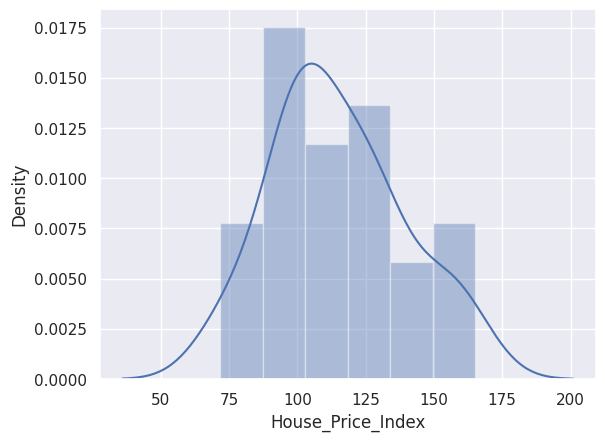

In [92]:
sns.distplot(df['House_Price_Index']);
#skewness and kurtosis
print("Skewness: %f" % df['House_Price_Index'].skew())
print("Kurtosis: %f" % df['House_Price_Index'].kurt())

In [93]:
numerical = df.select_dtypes(include=np.number).columns
categorical = df.select_dtypes(include=object).columns
print("Number of Numerical Columns:", len(numerical),
      "\nNumber of Categorical Columns:", len(categorical))


Number of Numerical Columns: 23 
Number of Categorical Columns: 1


In [94]:
df.isnull().sum().sum()

0

Plotting the relation between the House Price Index and all other numerical columns

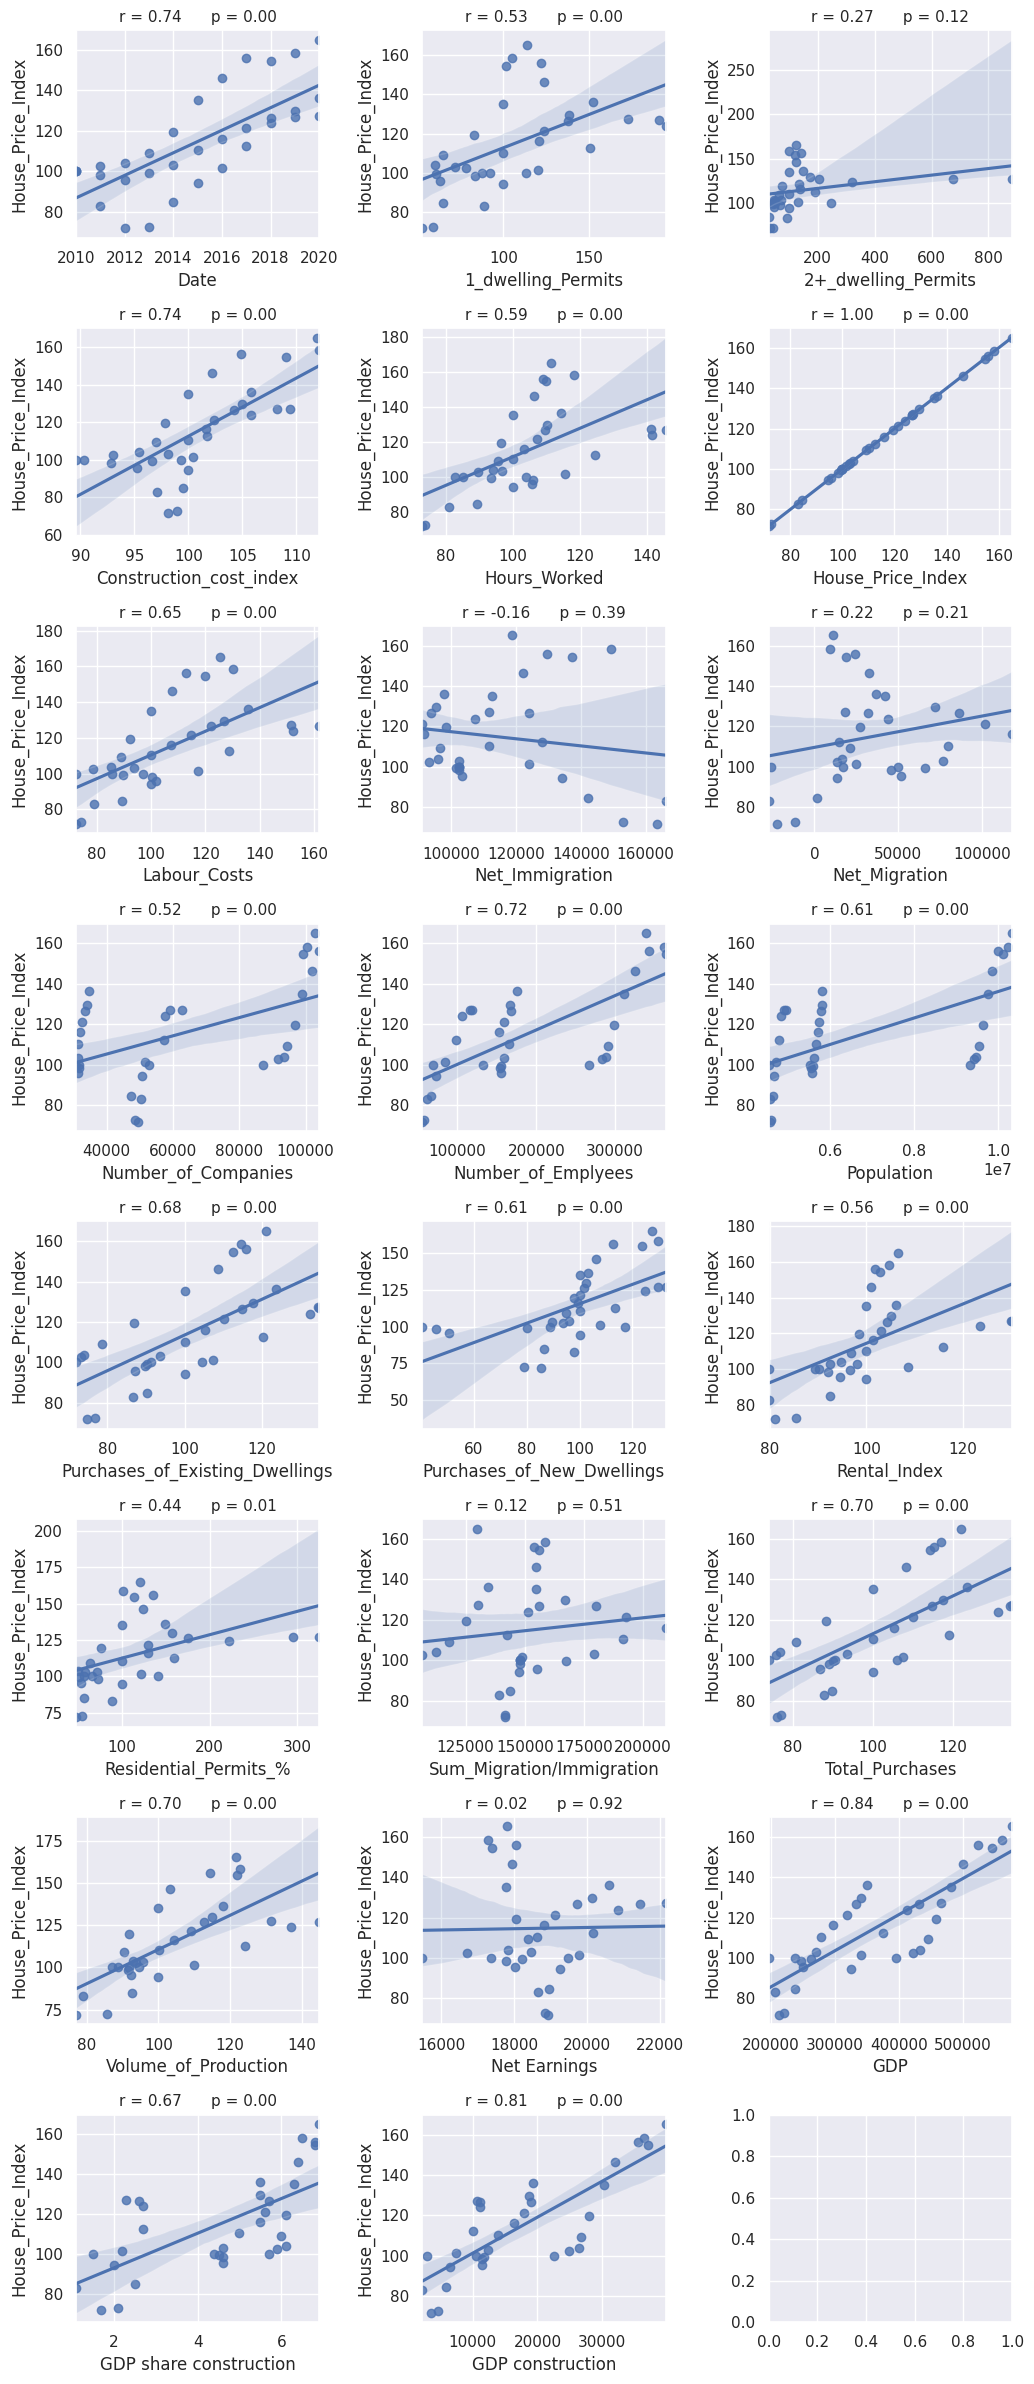

In [95]:
nr_rows = 8
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical)
li_not_plot = ['COUNTRY']
li_plot_num_feats = [c for c in list(numerical) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df[target], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()  

Finding Columns with strong correlation with the House Price Index

In [96]:
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(numerical)
ser_corr = corr_abs[target].sort_values(ascending=False)

cols_abv_corr_limit = ser_corr[ser_corr > min_val_corr].index.tolist()
cols_bel_corr_limit = ser_corr[ser_corr <= min_val_corr].index.tolist()

print("Columns with correlation above the limit:")
print(cols_abv_corr_limit)

print("\nColumns with correlation below or equal to the limit:")
print(cols_bel_corr_limit)

Columns with correlation above the limit:
['House_Price_Index', 'GDP', 'GDP construction', 'Date', 'Construction_cost_index', 'Number_of_Emplyees', 'Volume_of_Production', 'Total_Purchases', 'Purchases_of_Existing_Dwellings', 'GDP share construction', 'Labour_Costs', 'Population', 'Purchases_of_New_Dwellings', 'Hours_Worked', 'Rental_Index', '1_dwelling_Permits', 'Number_of_Companies', 'Residential_Permits_%']

Columns with correlation below or equal to the limit:
['2+_dwelling_Permits', 'Net_Migration', 'Net_Immigration', 'Sum_Migration/Immigration', 'Net Earnings']


In [97]:
#drop all the columns with low correlation
df = df.drop(columns = cols_bel_corr_limit + ['COUNTRY', 'Date'])

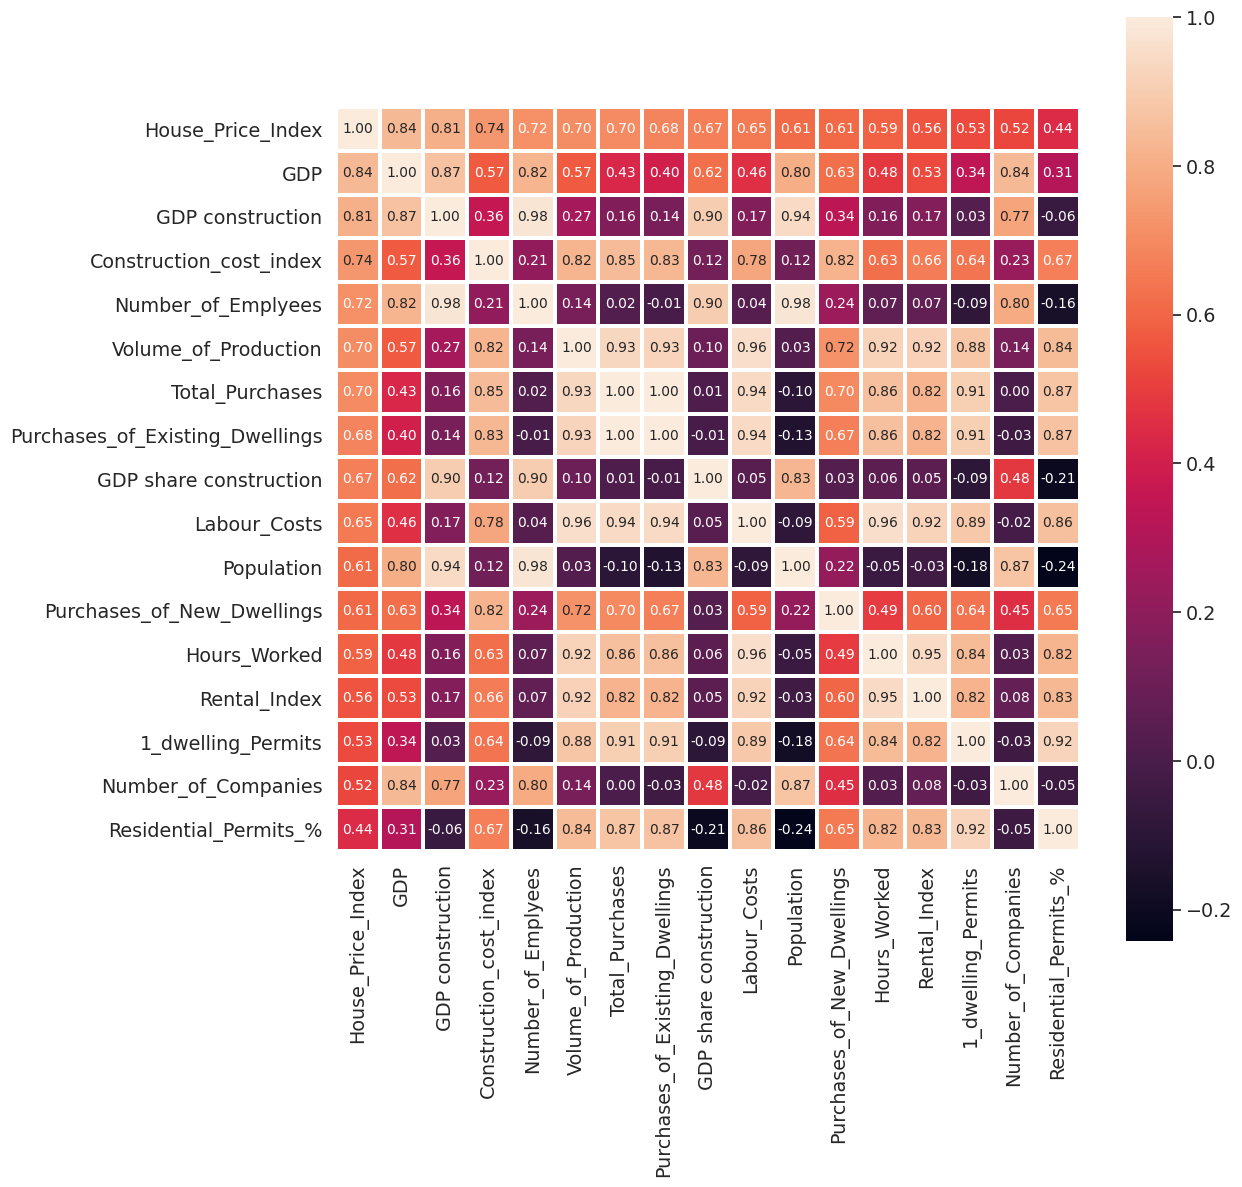

In [98]:
plot_corr_matrix(df, len(cols_abv_corr_limit), target)


Data Wrangling

In [99]:
corr2 = df.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

House_Price_Index                  1.000000
GDP                                0.838784
GDP construction                   0.810568
Construction_cost_index            0.737756
Number_of_Emplyees                 0.716419
Volume_of_Production               0.704353
Total_Purchases                    0.699747
Purchases_of_Existing_Dwellings    0.679910
GDP share construction             0.666668
Labour_Costs                       0.650603
Population                         0.612379
Purchases_of_New_Dwellings         0.611477
Hours_Worked                       0.589041
Rental_Index                       0.555581
1_dwelling_Permits                 0.531811
Number_of_Companies                0.522090
Residential_Permits_%              0.443061
Name: House_Price_Index, dtype: float64


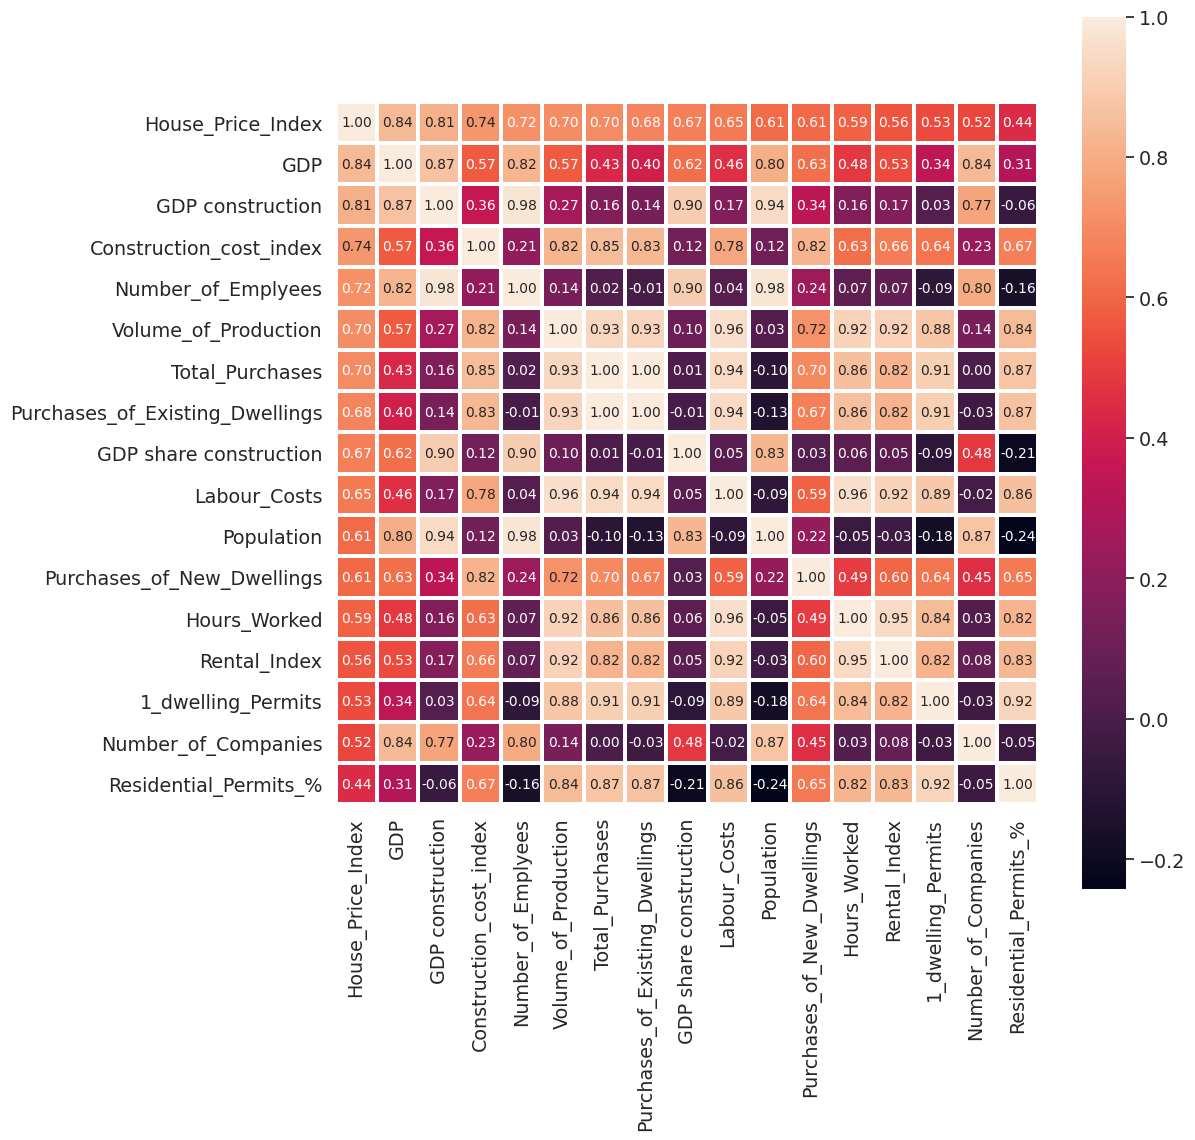

In [100]:
plot_corr_matrix(df, len(df.columns), target)

In [101]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

for col in ['GDP construction','GDP share construction', 'Date'] :
        if col in cols: 
            cols.remove(col)

In [102]:
df = df[cols].copy()

KeyError: ignored

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   House_Price_Index                33 non-null     float64
 1   GDP                              33 non-null     float64
 2   Construction_cost_index          33 non-null     float64
 3   Number_of_Emplyees               33 non-null     float64
 4   Volume_of_Production             33 non-null     float64
 5   Total_Purchases                  33 non-null     float64
 6   Purchases_of_Existing_Dwellings  33 non-null     float64
 7   Labour_Costs                     33 non-null     float64
 8   Population                       33 non-null     float64
 9   Purchases_of_New_Dwellings       33 non-null     float64
 10  Hours_Worked                     33 non-null     float64
 11  Rental_Index                     33 non-null     float64
 12  1_dwelling_Permits      

In [103]:
X = df.iloc[:, 0:14].values
y = df[target]

# Models

In [104]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

## Linear Regression

In [137]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [138]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
RMSE:  5.989314725056348e-12


## Polinomial Regression

In [139]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [140]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  0.985976767122277
RMSE:  3.3100785128496772


## Ridge Regression

In [141]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [142]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  -7.0350325770731015
R2_score (train):  0.9947956686529399
R2_score (test):  0.9816861592248264
RMSE:  3.7827177641969483


### Hyperparameter Ridge Regression

In [143]:
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('ridge', Ridge())
])

# Define the grid of hyperparameters to search
param_grid = {
    'ridge__alpha': np.logspace(-3,3,10),
    'ridge__fit_intercept': [True, False]
    #'ridge__normalize': [True, False]
}

# Initialize a GridSearchCV object that will execute the cross validation
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print('Best parameters:', best_params)

# Evaluate the model
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (train): ', r2_score_train)
print('R2_score (test): ', r2_score_test)
print("RMSE (train): ", rmse_train)
print("RMSE (test): ", rmse_test)


Best parameters: {'ridge__alpha': 0.001, 'ridge__fit_intercept': True}
R2_score (train):  0.9999969235908791
R2_score (test):  0.9999828326901536
RMSE (train):  0.03714814886094711
RMSE (test):  0.11581514220704293


## Lasso Regression

In [144]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [145]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.9992474593608947
R2_score (train):  0.9999996789798983
R2_score (test):  0.9999996550180842
RMSE:  0.01641770269258975


### Hyperparameter Lasso Regression

In [146]:
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lasso', Lasso())
])

# Define the grid of hyperparameters to search
param_grid = {
    'lasso__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
}

# Initialize a GridSearchCV object that will execute the cross validation
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model and print the best parameters
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)


Best parameters: {'lasso__alpha': 0.01}


## Support Vector Regression 

In [147]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.values.reshape(-1,1))

In [148]:
# Fitting the SVR Model to the dataset
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [149]:
# Reshaping X_train and X_test
X_train_reshaped = X_train.reshape(-1, 1) if len(X_train.shape) == 1 else X_train
X_test_reshaped = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = regressor_svr.predict(sc_X.transform(X_train_reshaped))
y_pred_svr_train = y_pred_svr_train.reshape(-1, 1)
y_pred_svr_train = sc_y.inverse_transform(y_pred_svr_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = regressor_svr.predict(sc_X.transform(X_test_reshaped))
y_pred_svr_test = y_pred_svr_test.reshape(-1, 1)
y_pred_svr_test = sc_y.inverse_transform(y_pred_svr_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)


CV:  -50.1487853189582
R2_score (train):  0.98334373669737
R2_score (test):  0.9098702572624597
RMSE:  8.391667887230476


### Hyperparameter Support Vector Regression 

In [150]:
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svr', SVR())
])

# Define the grid of hyperparameters to search
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize a GridSearchCV object that will execute the cross validation
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model and print the best parameters
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

Best parameters: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}


## Decision Tree Regressor

In [151]:
# Fitting the Decision Tree Regression Model to the dataset
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [152]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  -45.882948297857446
R2_score (train):  1.0
R2_score (test):  0.9632956754590047
RMSE:  5.355164796717277


### Hyperparameter Decision Tree Regressor

In [153]:
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreeRegressor())
])

# Define the grid of hyperparameters to search
param_grid = {
    'dt__max_depth': [None, 5, 10, 20, 30],
    'dt__min_samples_leaf': [1, 2, 5, 10],
    'dt__min_samples_split': [2, 5, 10]
}

# Initialize a GridSearchCV object that will execute the cross validation
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model and print the best parameters
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)


Best parameters: {'dt__max_depth': 20, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}


## Random Forest Regression

In [113]:
# Fitting the Random Forest Regression to the dataset
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [117]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  -14.280250311919398
R2_score (train):  0.9863688392106019
R2_score (test):  0.9108949903814783
RMSE:  8.343826841813042


### Hyperparameter Random Forest Regression

In [118]:
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor())
])

# Define the grid of hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_leaf': [1, 2, 5],
    'rf__min_samples_split': [2, 5, 10]
}

# Initialize a GridSearchCV object that will execute the cross validation
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model and print the best parameters
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}


In [119]:
best_params = grid.best_params_

regressor_rf_best = RandomForestRegressor(n_estimators = best_params['rf__n_estimators'], 
                                          max_depth = best_params['rf__max_depth'], 
                                          min_samples_leaf = best_params['rf__min_samples_leaf'], 
                                          min_samples_split = best_params['rf__min_samples_split'])

# Fit the model to the data
regressor_rf_best.fit(X_train, y_train)

# Cross Validation Score
cv_rf_best = cross_val_score(estimator = regressor_rf_best, X = X_scaled, y = y_train.ravel(), cv = 10)

# R2 Score for the Train set results
y_pred_rf_train_best = regressor_rf_best.predict(X_train)
r2_score_rf_train_best = r2_score(y_train, y_pred_rf_train_best)

# R2 Score for the Test set results
y_pred_rf_test_best = regressor_rf_best.predict(X_test)
r2_score_rf_test_best = r2_score(y_test, y_pred_rf_test_best)

# RMSE for the Test set results
rmse_rf_best = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test_best)))



## Measuring the error

In [121]:
# Measuring Error
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('Random Forest Regression (Best Params)', rmse_rf_best, r2_score_rf_train_best, r2_score_rf_test_best, cv_rf_best.mean())]

predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

NameError: ignored

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.016498,0.999633,0.993300,0.980588
1,Polynomial Regression (2nd),0.015799,1.000000,0.993856,0.980588
2,Ridge Regression,0.043086,0.993254,0.954305,0.906653
3,Lasso Regression,0.032032,0.985723,0.974744,0.928674
4,Support Vector Regression,0.061605,0.968618,0.906583,0.775271
5,Decision Tree Regression,0.084658,1.000000,0.823587,0.328796
6,Random Forest Regression,0.083366,0.981245,0.828929,0.499987


## Model Performance

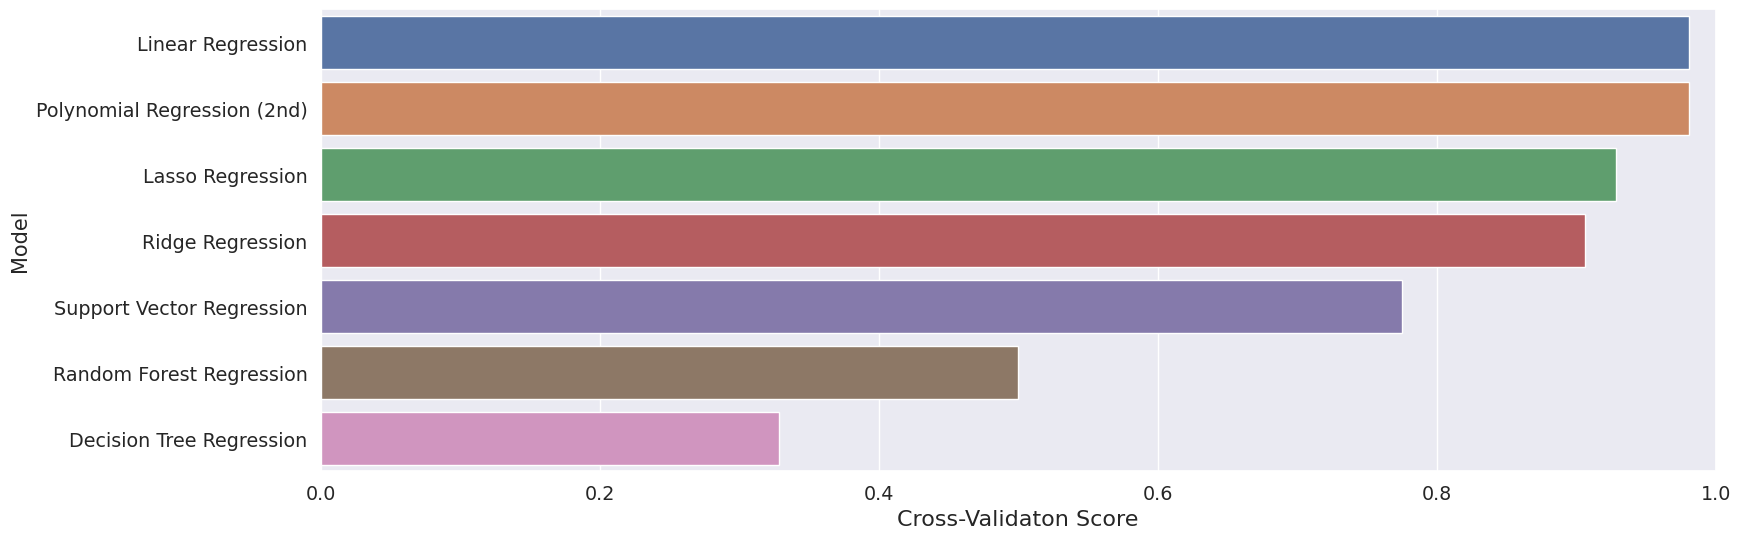

In [89]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

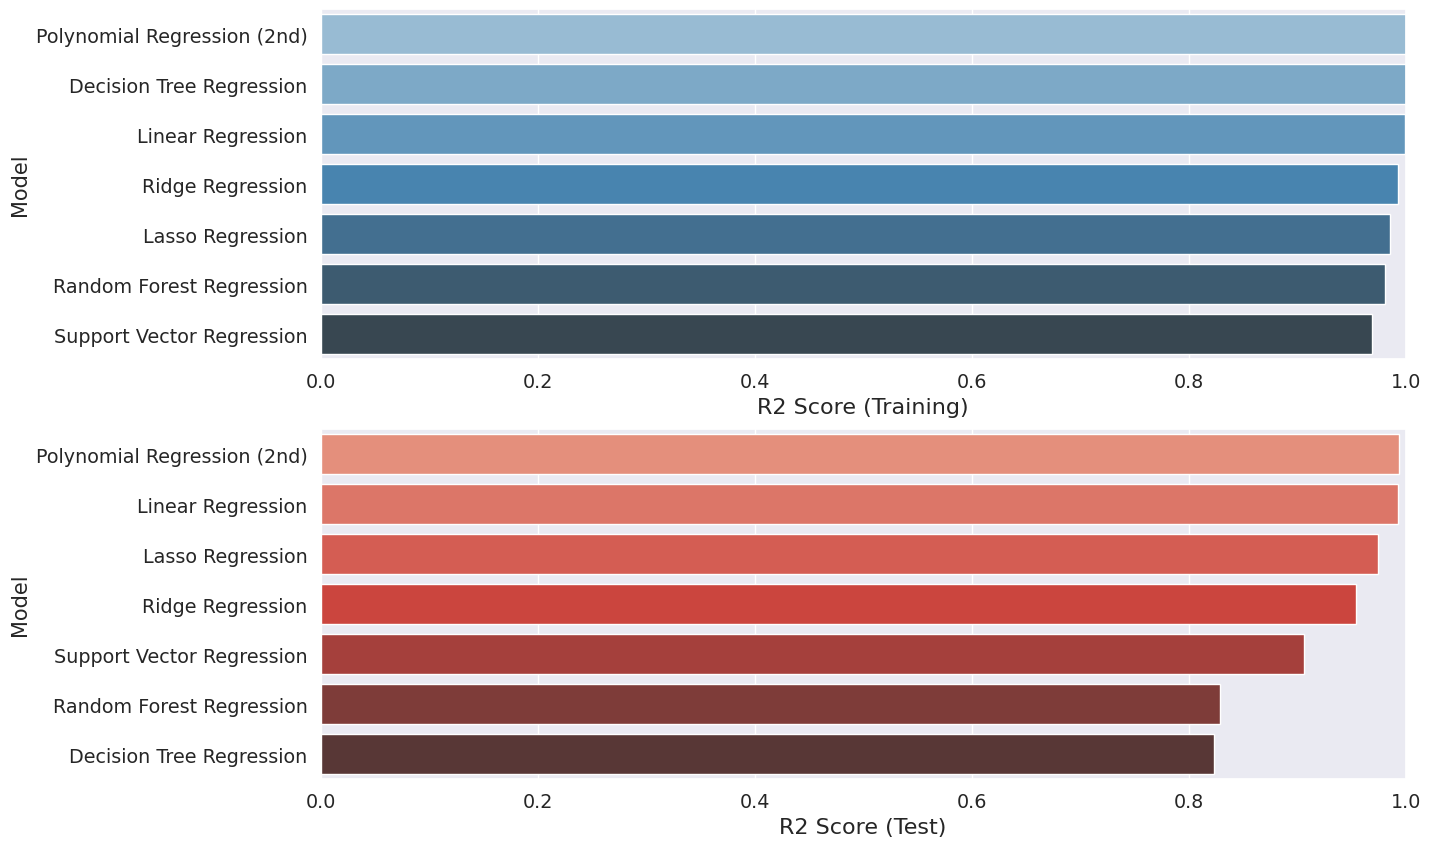

In [90]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

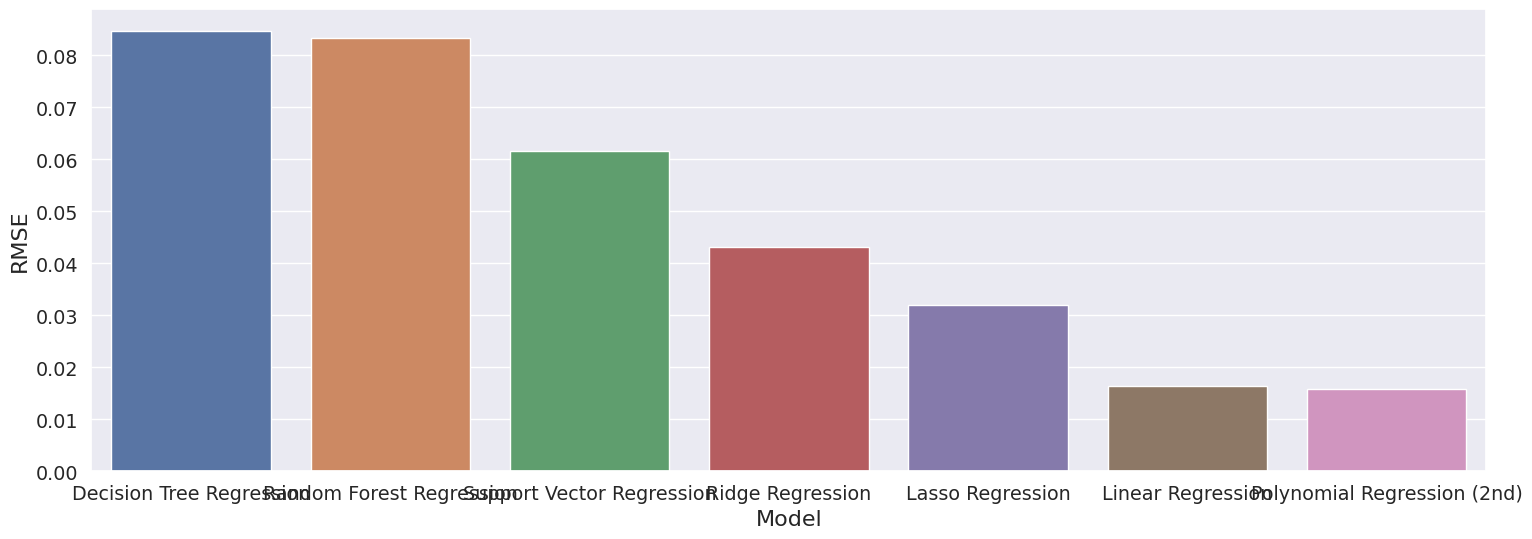

In [91]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,10))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()